In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm
import random

In [36]:
# 1. Overview: Simulate movie dataset with genres, budget, and revenue
np.random.seed(42)
num_movies = 100

genres = ['Action', 'Drama', 'Comedy', 'Horror', 'Romance', 'Sci-Fi']
budgets = np.random.randint(10, 300, size=num_movies) * 1e6  # in millions
revenues = budgets * np.random.uniform(0.5, 3.0, size=num_movies)  # revenue in millions
weeks_top_10 = np.random.randint(1, 15, size=num_movies)

movie_data = pd.DataFrame({
    'Genre': np.random.choice(genres, size=num_movies),
    'Budget ($M)': budgets,
    'Revenue ($M)': revenues,
    'Weeks in Top 10': weeks_top_10
})
movie_data

,Genre,Budget ($M),Revenue ($M),Weeks in Top 10
0,Romance,112000000.0,2.580843e+08,11
1,Action,280000000.0,3.051894e+08,7
2,Comedy,116000000.0,1.322598e+08,9
3,Drama,81000000.0,4.868780e+07,9
4,Action,198000000.0,4.507781e+08,3
...,...,...,...,...
95,Action,44000000.0,7.882995e+07,3
96,Drama,236000000.0,2.718892e+08,12
97,Sci-Fi,110000000.0,3.289698e+08,1
98,Sci-Fi,140000000.0,4.078968e+08,4


In [32]:
# 2. Define revenue categories (Low: < $50M, Medium: $50M-$150M, High: > $150M)
def categorize_revenue(revenue):
    if revenue < 50e6:
        return 'Low'
    elif revenue < 150e6:
        return 'Medium'
    else:
        return 'High'

movie_data['Revenue Category'] = movie_data['Revenue ($M)'].apply(categorize_revenue)
movie_data

,Genre,Budget ($M),Revenue ($M),Weeks in Top 10,Revenue Category
0,Romance,112000000.0,2.580843e+08,11,High
1,Action,280000000.0,3.051894e+08,7,High
2,Comedy,116000000.0,1.322598e+08,9,Medium
3,Drama,81000000.0,4.868780e+07,9,Low
4,Action,198000000.0,4.507781e+08,3,High
...,...,...,...,...,...
95,Action,44000000.0,7.882995e+07,3,Medium
96,Drama,236000000.0,2.718892e+08,12,High
97,Sci-Fi,110000000.0,3.289698e+08,1,High
98,Sci-Fi,140000000.0,4.078968e+08,4,High


In [6]:
# 3. Probability of each revenue category
revenue_counts = movie_data['Revenue Category'].value_counts(normalize=True)
low_prob, medium_prob, high_prob = revenue_counts['Low'], revenue_counts['Medium'], revenue_counts['High']

In [7]:
# 4. Simulate probability distributions
# Binomial: Weeks in Top 10
n_trials = 10
p_success = 0.3  # arbitrary success probability
binom_dist = binom(n_trials, p_success)

# Poisson: Movies exceeding revenue threshold ($100M)
lambda_ = 100  # mean value for Poisson
poisson_dist = poisson(lambda_)

# Normal: Overall revenue distribution
mean_revenue = np.mean(movie_data['Revenue ($M)'])
std_revenue = np.std(movie_data['Revenue ($M)'])
normal_dist = norm(mean_revenue, std_revenue)

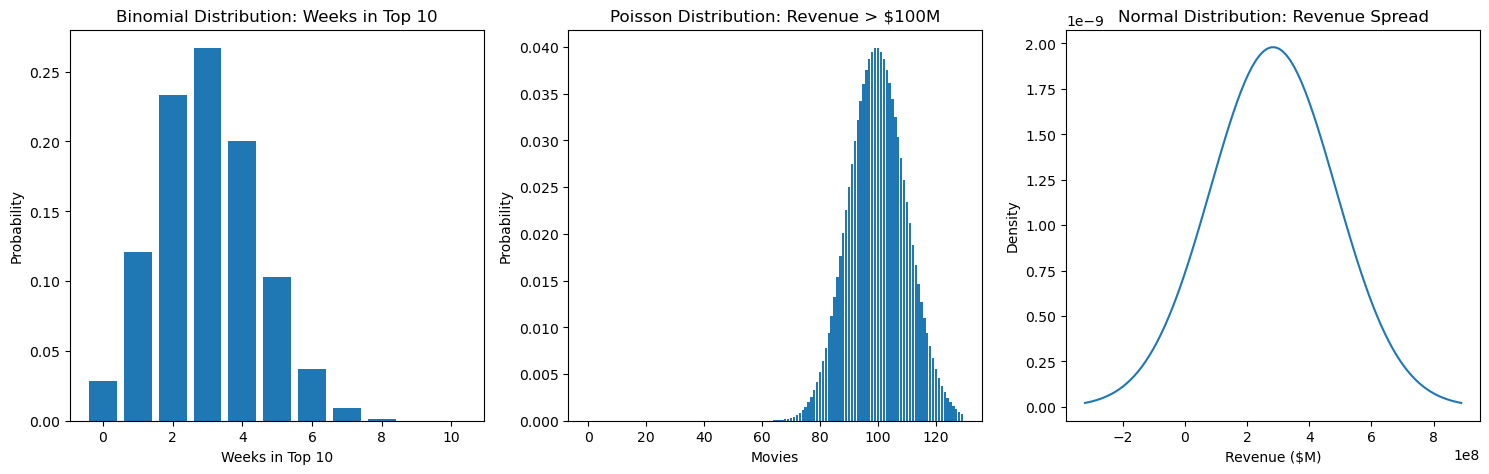

In [26]:
# 5. Plot distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Binomial distribution plot
x_binom = np.arange(0, n_trials + 1)
axs[0].bar(x_binom, binom_dist.pmf(x_binom))
axs[0].set_title('Binomial Distribution: Weeks in Top 10')
axs[0].set_xlabel('Weeks in Top 10')
axs[0].set_ylabel('Probability')

# Poisson distribution plot
x_poisson = np.arange(0, lambda_ + 30)
axs[1].bar(x_poisson, poisson_dist.pmf(x_poisson))
axs[1].set_title('Poisson Distribution: Revenue > $100M')
axs[1].set_xlabel('Movies')
axs[1].set_ylabel('Probability')

# Normal distribution plot
x_norm = np.linspace(mean_revenue - 3*std_revenue, mean_revenue + 3*std_revenue, 100)
axs[2].plot(x_norm, normal_dist.pdf(x_norm))
axs[2].set_title('Normal Distribution: Revenue Spread')
axs[2].set_xlabel('Revenue ($M)')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [38]:
#data overview
movie_data.head(), revenue_counts

(     Genre  Budget ($M)  Revenue ($M)  Weeks in Top 10
 0  Romance  112000000.0  2.580843e+08               11
 1   Action  280000000.0  3.051894e+08                7
 2   Comedy  116000000.0  1.322598e+08                9
 3    Drama   81000000.0  4.868780e+07                9
 4   Action  198000000.0  4.507781e+08                3,
 Revenue Category
 High      0.67
 Medium    0.23
 Low       0.10
 Name: proportion, dtype: float64)